# 期中專題題目說明：

透過Scrapy爬下104與1111兩大求職網，關於軟體工程師的訊息，整理資料後，輸出成csv檔，並透過numpy分析，市場需求的人

# 動機介紹：

在104與1111上，刊登許多軟體工程師的職缺，是我經常會上去看的資訊，透過這次機會，我自學了Scrapy來使用爬蟲幫助我將每個職缺的資訊爬下來，不僅ㄧ望無遺，還能自己使用numpy,pandas對這些資料做處理，完全實現了「資料分析」這件事。

# 期中專題流程：
分為兩個部分，為：

## ㄧ、爬蟲程式
爬蟲程式的部分，由於內容太多，所以我把用Scrapy實現爬蟲的過程寫在Github README檔案中，如下連結，煩請助教、老師一定要查看，我認真寫很久QQ

透過Scrapy抓取1111及104的資料：

https://github.com/b10402113/Python-Machine-Learning/tree/master/%E6%9C%9F%E4%B8%AD%E5%B0%88%E9%A1%8C


## 二、資料分析

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 查看資料型態
爬完所需的資料後，我們就可以開始做資料分析了，第一步，查看一下我們資料是否正確

In [12]:
df_1111=pd.read_csv("file1.csv")

In [13]:
df_104=pd.read_csv("file2.csv")

In [14]:
df_1111.head()

,job_company,job_date,job_salary,job_title
0,新時代多媒體有限公司,2019-04-18,"月薪 50,000~100,000元",網站前端工程師
1,盈德網絡服務有限公司,2019-04-18,面議（經常性薪資4萬含以上）,5加2_前端網頁開發工程師(JAVA)
2,宏傑資訊股份有限公司,2019-04-17,面議（經常性薪資4萬含以上）,"JSP Web(具PM,SA,PG能力)資深工程師"
3,互聯服務有限公司,2019-04-15,"月薪 50,000~60,000元",軟體工程師
4,碩華資產股份有限公司,2019-04-19,"月薪 50,000~70,000元",網頁前端工程師（VUEJS）


In [15]:
df_104.head()

,job_company,job_date,job_salary,job_title
0,IBM_台灣國際商業機器股份有限公司,NaN,待遇面議,(GBS) Application Developer –Cloud Microservic...
1,IBM_台灣國際商業機器股份有限公司,NaN,待遇面議,(GBS) Package Solution Consultant - SAP.Hana S...
2,希格斯資訊科技有限公司,NaN,"月薪 48,000~90,000元",全端 (前/後端) 軟體工程師 (.NET C#)
3,104人力銀行_一零四資訊科技股份有限公司,NaN,待遇面議,資深前端工程師 Sr.Front-End Web Developer (前端工程部)
4,奇韋系統股份有限公司,NaN,待遇面議,"程式設計師 起薪 60,000 起 第 2年 65,000 元起 從不加班 ..."


In [19]:
# 因為資料有NaN，所以先把資料不齊全的刪掉
df_104_1 = df_104.dropna()

In [20]:
df_104_1.head()

,job_company,job_date,job_salary,job_title
10,小北百貨有限公司,4/19,"月薪 24,100元",台南區-資訊部-資訊組員
11,極限科技股份有限公司,4/19,待遇面議,Android 開發工程師
12,極限科技股份有限公司,4/19,"月薪 30,000~39,999元",網站前端工程師A
13,極限科技股份有限公司,4/19,待遇面議,iOS 開發工程師
14,極限科技股份有限公司,4/19,待遇面議,網站前端工程師B


接下來，讓我們把兩間公司的人數做個分類

In [59]:
# 104的公司
labels = 'ios','android','frontEnd','System','Python','java','backEnd','Game','Php','alogorthm'
ios_count = df_104_1[df_104_1.job_title.str.contains('iOS')].job_company.count()
android_count = df_104_1[df_104_1.job_title.str.contains('Android')].job_company.count()
frontEnd_count = df_104_1[df_104_1.job_title.str.contains('前端')].job_company.count()
System_count = df_104_1[df_104_1.job_title.str.contains('系統')].job_company.count()
Python_count = df_104_1[df_104_1.job_title.str.contains('Python')].job_company.count()
java_count = df_104_1[df_104_1.job_title.str.contains('Java')].job_company.count()
backEnd_count = df_104_1[df_104_1.job_title.str.contains('後端')].job_company.count()
Game_count = df_104_1[df_104_1.job_title.str.contains('遊戲')].job_company.count()
Php_count = df_104_1[df_104_1.job_title.str.contains('PHP')].job_company.count()
alogorthm_count = df_104_1[df_104_1.job_title.str.contains('演算法')].job_company.count()

In [60]:
size = [ios_count,android_count,frontEnd_count,System_count,Python_count,java_count,backEnd_count,Game_count,Php_count,alogorthm_count]

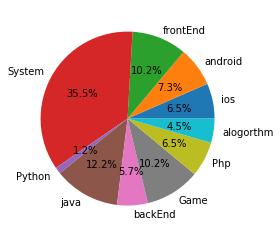

In [62]:
plt.pie(size , labels = labels,autopct='%1.1f%%');

可見104招募最多的是系統工程師，次多的是Java那麼104呢？

In [68]:
# 1111的公司
one_labels = 'ios','android','frontEnd','System','Python','java','backEnd','Game','Php','alogorthm'
one_ios_count = df_1111[df_1111.job_title.str.contains('iOS')].job_company.count()
one_android_count = df_1111[df_1111.job_title.str.contains('Android')].job_company.count()
one_frontEnd_count = df_1111[df_1111.job_title.str.contains('前端')].job_company.count()
one_System_count = df_1111[df_1111.job_title.str.contains('系統')].job_company.count()
one_Python_count = df_1111[df_1111.job_title.str.contains('Python')].job_company.count()
one_java_count = df_1111[df_1111.job_title.str.contains('Java')].job_company.count()
one_backEnd_count = df_1111[df_1111.job_title.str.contains('後端')].job_company.count()
one_Game_count = df_1111[df_1111.job_title.str.contains('遊戲')].job_company.count()
one_Php_count = df_1111[df_1111.job_title.str.contains('PHP')].job_company.count()
one_alogorthm_count = df_1111[df_1111.job_title.str.contains('演算法')].job_company.count()
size = [one_ios_count,one_android_count,one_frontEnd_count,one_System_count,one_Python_count,one_java_count,one_backEnd_count,one_Game_count,one_Php_count,one_alogorthm_count]

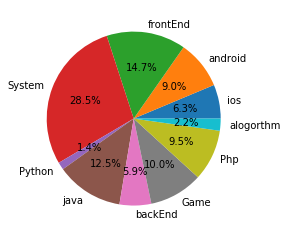

In [69]:
plt.pie(size , labels = labels,autopct='%1.1f%%');

在1111中，系統還是佔最多，但次多的則是前端工程